## Problem Statement

The Health Company, which provides various diet plans to lose weight, conducted a market test experiment to test three different levels of diets (A, B, C). Each diet had a different impact on the weight after following the diet for 6 weeks. We are given a dataset of 78 observations who are provided with either of the diet plans - A, B, or C, along with their weights before and 6 weeks after taking the diet. The information is recorded in the columns 'diet', 'preweight', and 'weight6weeks'.

Find statistical evidence to check whether the mean weight losses with respect to the three diet plans are significantly different.

## Data Dictionary

diet: Type of the diet

preweight: Weight before following the diet plan

weight6weeks: Weight after 6 weeks of following the diet plan

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### Reading the data into a dataframe

In [2]:
df=pd.read_csv('diet.csv')
df.head()

,diet,preweight,weight6weeks
0,B,60,60.0
1,B,103,103.0
2,A,58,54.2
3,A,60,54.0
4,A,64,63.3


In [3]:
# shape of the dataset
df.shape

(78, 3)

* The dataset contains 78 rows and 3 columns

In [4]:
# information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


* The `Diet` column is categorical. While, `preweight` and `weight6weeks` are numerical.

In [5]:
# distinct values of Diet
df.diet.value_counts()

B    27
C    27
A    24
Name: diet, dtype: int64

* As mentioned in the problem statement, there are three types of diet plans: A, B, and C

In [6]:
# summary of the dataset
df.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


* The mean weight before any diet plan is 72.53 kg, while the mean weight after 6 weeks of a diet plan is 68.68 kg.
* Overall it can be seen that weights have been reduced after taking a diet.

### Creating a new column 'weightloss'

In [7]:
# weightloss = (post-weight) - (pre-weight)
df['weightloss'] = df['weight6weeks'] - df['preweight']
df.head()

,diet,preweight,weight6weeks,weightloss
0,B,60,60.0,0.0
1,B,103,103.0,0.0
2,A,58,54.2,-3.8
3,A,60,54.0,-6.0
4,A,64,63.3,-0.7


In [8]:
# check for missing values
df.isnull().sum()

diet            0
preweight       0
weight6weeks    0
weightloss      0
dtype: int64

* There are no missing values in the dataset

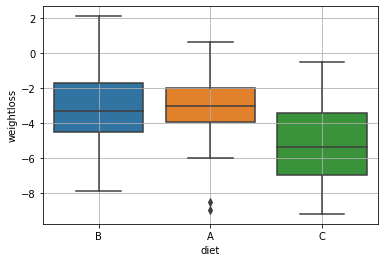

In [9]:
# visual analysis of the weightloss for the three diet-plans
sns.boxplot(x="diet", y="weightloss", data = df)
plt.grid()
plt.show()

* The distribution of weight loss differs among the three groups.
* Diet plan C is impacting the highest weight loss.

## Step 1: Define null and alternate hypotheses

$H_0$ : The mean weight losses with respect to each diet category is equal.

$H_a$ : At least one of the mean weight losses with respect to the three diet category is different.

## Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The weight losses follow a normal distribution

against the alternative hypothesis

>$H_a:$ The weight losses do not not follow a normal distribution

In [12]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df['weightloss']) 
print('The p-value is', p_value)

The p-value is 0.8019816875457764


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [11]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df[df['diet']=='A']['weightloss'],
                            df[df['diet']=='B']['weightloss'],
                            df[df['diet']=='C']['weightloss'])
print('The p-value is', p_value)

The p-value is 0.5376731304274011


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

## Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

## Step 4: Collect and prepare data

In [13]:
# separate the weightlosses with respect to the three diet-plans
weightloss_diet_A = df[df['diet']=='A']['weightloss']
weightloss_diet_B = df[df['diet']=='B']['weightloss']
weightloss_diet_C = df[df['diet']=='C']['weightloss']

## Step 5: Calculate the p-value

In [14]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value = stats.f_oneway(weightloss_diet_A, weightloss_diet_B, weightloss_diet_C)
print('The p-value is ', p_value)

The p-value is  0.0032290142385893524


## Step 6: Compare the p-value with $\alpha$

In [15]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0032290142385893524 is less than the level of significance, we reject the null hypothesis.


## Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean weight losses with respect to the three diet plans are different.